# Assignment-1: Transformations and representations

Team Name: BayesianMechanics 

Roll number: 2018113001 2018113002

# Instructions

- Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment. See `Set Up` for detailed step-by-step instructions about the installation setup.
- Save all your results in ```results/<question_number>/<sub_topic_number>/```
- The **References** section provides you with important resources to solve the assignment.
- For this assignment, you will be using Open3D extensively. Refer to [Open3D Documentation](http://www.open3d.org/docs/release/): you can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment. 
- Make sure your code is modular since you may need to reuse parts for future assignments.
- Answer the descriptive questions in your own words with context & clarity. Do not copy answers from online resources or lecture notes.
- The **deadline** for this assignment is on 11/09/2021 at 11:55pm. Please note that there will be no extensions.
- Plagiarism is **strictly prohibited**.


# Submission Instructions

1. Make sure your code runs without any errors after reinitializing the kernel and removing all saved variables.
2. After completing your code and saving your results, zip the folder with name as ``Team_<team_name>_MR2021_Assignment_<assignment_number>.zip``

# Set Up

We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment. All assignments will be python based, hence familiarising yourself with Python is essential.


## Setting up Anaconda environment (Recommended)

1. Install Anaconda or Miniconda from [here](https://docs.conda.io/projects/conda/en/latest/user-guide/install/linux.html) depending on your requirements.
2. Now simply run `conda env create -f environment.yml` in the current folder to create an environment `mr_assignment1` (`environment.yml` can be found in `misc/`).
3. Activate it using `conda activate mr_assignment1`.

## Setting up Virtual environment using venv

You can also set up a virtual environment using venv

1. Run `sudo apt-get install python3-venv` from command line.
2. `python3 -m venv ~/virtual_env/mr_assignment1`. (you can set the environment path to anything)
3. `source ~/virtual_env/mr_assignment1/bin/activate`
4. `pip3 install -r requirements.txt` from the current folder (`requirements.txt` can be found in `misc/`).

In [15]:
import time

import open3d as o3d
import numpy as np

# 1. Getting started with Open3D

Open3D is an open-source library that deals with 3D data, such as point clouds, mesh. We'll be using Open3D frequently as we work with point clouds. Let's start with something simple:

<img src="misc/bunny.jpg" alt="drawing" width="200"/>

1. Read the Stanford Bunny file (in `data/`) given to you and visualise it using Open3D.
2. Convert the mesh to a point cloud and change the colour of points.
3. Set a predefined viewing angle (using Open3D) for visualization and display the axes while plotting.
4. Scale, Transform, and Rotate the rabbit (visualise after each step).
5. Save the point cloud as bunny.pcd.

### Question 1-a-1 

In [16]:
mesh = o3d.io.read_triangle_mesh("data/bunny.ply")
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

### Question 1-a-2

In [17]:
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
pcd.normals = mesh.vertex_normals
o3d.visualization.draw_geometries([pcd])

### Question 1-a-3

In [18]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1)
o3d.visualization.draw_geometries([pcd, mesh], zoom=2.0, front=[-1, 0, 0], up=[0, 1, 0], lookat=[0, 0, 0],
                                  mesh_show_wireframe=True)

### Question 1-a-4

In [19]:
pcd.scale(2.0, center=np.zeros(3))
o3d.visualization.draw_geometries([pcd, mesh], zoom=2.0, front=[-1, 0, 0], up=[0, 1, 0], lookat=[0, 0, 0],
                                  mesh_show_wireframe=True)
pcd.rotate(np.array([
    [np.cos(30), -np.sin(30), 0],
    [np.sin(30),  np.cos(30), 0],
    [         0,           0, 1],
]))
o3d.visualization.draw_geometries([pcd, mesh], zoom=2.0, front=[-1, 0, 0], up=[0, 1, 0], lookat=[0, 0, 0],
                                  mesh_show_wireframe=True)

pcd.translate(np.array([1.0, 1.0, 1.0]))
o3d.visualization.draw_geometries([pcd, mesh], zoom=2.0, front=[-1, 0, 0], up=[0, 1, 0], lookat=[0, 0, 0],
                                  mesh_show_wireframe=True)

### Question 1-a-5

In [20]:
o3d.io.write_point_cloud('data/bunny.pcd', pcd)

True

# 2. Transformations and representations

## a) Euler angles
1. Write a function that returns a rotation matrix given the angles $\alpha$, $\beta$, and $\gamma$ in radians (X-Y-Z)

2. Solve for angles using ```fsolve from scipy``` for three initializations of your choice and compare.
$$M(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0.26200263 & -0.19674724 & 0.944799 \\0.21984631 & 0.96542533 & 0.14007684 \\
    -0.93969262 & 0.17101007 & 0.29619813\end{array}\right] 
$$

$$N(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0 & -0.173648178 &  0.984807753 \\0 & 0.984807753 & 0.173648178 \\
    -1 & 0 & 0\end{array}\right] 
$$

3. What is a Gimbal lock? 

4. Show an example where a Gimbal lock occurs and visualize the Gimbal lock on the given bunny point cloud. You have to show the above by **animation** (cube rotating along each axis one by one).
    - *Hint: Use Open3D's non-blocking visualization and discretize the rotation to simulate the animation. For example, if you want to rotate by $30^{\circ}$ around a particular axis, do in increments of $5^{\circ}$ 6 times to make it look like an animation.*


### Question 2-a-1

In [21]:
def make_rotation_matrix(theta):
    net_rotation = np.eye(3)
    for i in range(3):
        rot = np.array([
            [np.cos(theta[i]), -np.sin(theta[i])],
            [np.sin(theta[i]), np.cos(theta[i])],
        ])
        cur_rotation = np.eye(3)
        for x in range(3):
            for y in range(3):
                cur_rotation[x, y] = rot[x - (1 if x >= i else 0), y - (1 if y >= i else 0)] \
                    if x != i and y != i else x == y
        net_rotation = cur_rotation @ net_rotation
    return net_rotation

np.round(make_rotation_matrix([np.pi/2, 0, np.pi/4]), decimals=3)

array([[ 0.707, -0.   ,  0.707],
       [ 0.707,  0.   , -0.707],
       [ 0.   ,  1.   ,  0.   ]])

### Question 2-a-2

In [32]:
from scipy.optimize import fsolve

M = np.array([
    [ 0.26200263, -0.19674724,   0.944799],
    [ 0.21984631,  0.96542533, 0.14007684],
    [-0.93969262,  0.17101007, 0.29619813]
])
N = np.array([
    [          0, -0.173648178, 0.984807753],
    [          0,  0.984807753, 0.173648178],
    [         -1,            0,           0]
])

print("Euler Angles X-Y-Z for M in degrees:",
    fsolve(lambda x: np.reshape(make_rotation_matrix(x) - M, -1), np.random.random(9))[:3] * 180 / np.pi)
print("Euler Angles X-Y-Z for N in degrees:",
    fsolve(lambda x: np.reshape(make_rotation_matrix(x) - N, -1), np.random.random(9))[:3] * 180 / np.pi)

Euler Angles X-Y-Z for M in degrees: [ 30.00000026 -70.00000009  40.00000001]
Euler Angles X-Y-Z for N in degrees: [ 45.7137304  -90.          55.71373042]


### Question 2-a-3

Gimble lock is the state when there is a system with 3 nested rotational degrees of freedom, and due to the parallel alignment of two of the outer rotation planes, the rotation effect produced by rotating two of the three rotors is the same. Therefore, the system has lost a degree of freedom.

Image from: https://www.researchgate.net/figure/llustrates-the-principle-of-gimbal-lock-The-outer-blue-frame-represents-the-x-axis-the_fig4_338835648

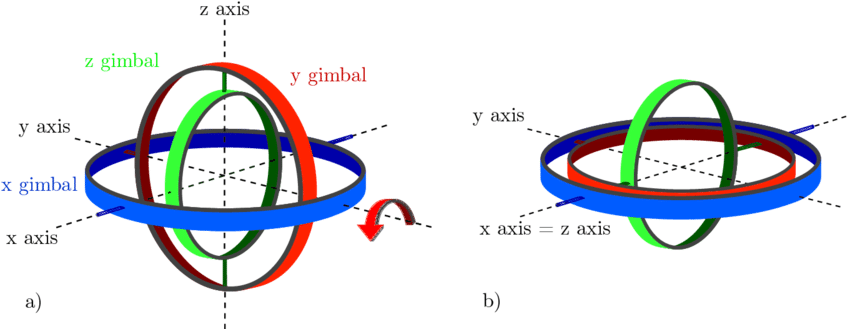

### Question 2-a-4

In the following animation, we do two sets of operations to the bunny.
1. Initially both (axis 1 and axis 2) the gimbal axes are aligned, i.e. they are in the same plane, we see that the effect or rotating along axis 1 and axis 3 is the same. We can see this alignment in the first loop since the angle of rotation of the axis 2 is set to 90 degrees, that is it's in the plane.
2. Now the gimbal lock is removed, since the axis 2 is set to 0 degrees, the whole system is unlocked, and rotation along axis 1 and axis 3 gives different results.

In [23]:
mesh = o3d.io.read_triangle_mesh("data/bunny.ply")
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
pcd.normals = mesh.vertex_normals

rotation_axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.08)
static_axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)

# Initialization of the Window and Objects
win = o3d.visualization.Visualizer()
win.create_window()
for obj in [pcd, rotation_axis, static_axis]:
    win.add_geometry(obj)
win.poll_events()
win.update_renderer()

steps = 100

# Rotations in the locked position

last_rotation = np.eye(3)
for angle_x, angle_z in list(zip(np.linspace(0, 2 * np.pi, steps), np.zeros(steps))) +\
                        list(zip(np.zeros(steps), np.linspace(0, 2 * np.pi, steps))):
    target_rotation = make_rotation_matrix([angle_x, np.pi / 2, angle_z])
    cur_rotation = target_rotation @ last_rotation.T
    last_rotation = target_rotation
    time.sleep(0.05)
    for obj in [pcd, rotation_axis]:
        obj.rotate(cur_rotation, center=np.zeros(3))
        win.update_geometry(obj)
    win.poll_events()
    win.update_renderer()        

time.sleep(1)
win.poll_events()
win.update_renderer()        

# Rotations in the unlocked position

last_rotation = np.eye(3)
for angle_x, angle_z in list(zip(np.linspace(0, 2 * np.pi, steps), np.zeros(steps))) +\
                        list(zip(np.zeros(steps), np.linspace(0, 2 * np.pi, steps))):
    target_rotation = make_rotation_matrix([angle_x, 0, angle_z])
    cur_rotation = target_rotation @ last_rotation.T
    last_rotation = target_rotation
    time.sleep(0.05)
    for obj in [pcd, rotation_axis]:
        obj.rotate(cur_rotation, center=np.zeros(3))
        win.update_geometry(obj)
    win.poll_events()
    win.update_renderer()

time.sleep(1)

win.destroy_window()

## b) Quaternions

1. What makes Quaternions popular in graphics? 
2. Convert a rotation matrix to quaternion and vice versa. Do not use inbuilt libraries for this question.
3. Perform matrix multiplication of two $\mathcal{R}_{3 \times 3}$ rotation matrices and perform the same transformation in the quaternion space. Verify if the final transformation obtained in both the cases are the same.
4. Try to interpolate any 3D model (cube / bunny / not sphere obviously!!) between two rotation matrices and visualize!

The above questions require you to **code your own functions** and **only verify** using inbuilt functions.

### Question 2-b-1

Quaternions form a number system in a hyper-sphere's surface (in 4D space), which helps in performing rotations in 3D space. We know that complex numbers help us rotate vectors in 2D space, so multiplication by 2D number rotates the 2D number. However, we cannot use 3D numbers to rotate the 3D coordinate frame, since points on a 3D sphere have 2 degrees of freedom, but the 3D coordinate frame has 3 degrees of freedom, so we need Quaternions to rotate them.

Quaternions are great since they allow easy manipulation, i.e. rotating around some arbitrary vector, composing two rotations by multiplying them, etc. They do not have the issues of gimbal lock.

### Question 2-b-2

In [33]:
# Formulae for conversion inspired from 
# https://www.euclideanspace.com/maths/geometry/rotations/conversions/matrixToQuaternion/

def quaternion_to_matrix(q):
    return np.array([
        [2 * (q[0] * q[0] + q[1] * q[1]) - 1, 2 * (q[1] * q[2] - q[0] * q[3]), 2 * (q[1] * q[3] + q[0] * q[2])],
        [2 * (q[1] * q[2] + q[0] * q[3]), 2 * (q[0] * q[0] + q[2] * q[2]) - 1, 2 * (q[2] * q[3] - q[0] * q[1])],
        [2 * (q[1] * q[3] - q[0] * q[2]), 2 * (q[2] * q[3] + q[0] * q[1]), 2 * (q[0] * q[0] + q[3] * q[3]) - 1],
    ])

def matrix_to_quaternion(m):
    if np.trace(m) > 0: 
      s = np.sqrt(np.trace(m) + 1.0) * 2;
      return np.array([0.25 * s, (m[2, 1] - m[1, 2]) / s, (m[0, 2] - m[2, 0]) / s, (m[1, 0] - m[0, 1]) / s]) 
    elif m[0, 0] > m[1, 1] and m[0, 0] > m[2, 2]:
      s = np.sqrt(1.0 + m[0, 0] - m[1, 1] - m[2, 2]) * 2 
      return np.array([(m[2, 1] - m[1, 2]) / s, 0.25 * s, (m[0, 1] + m[1, 0]) / s, (m[0, 2] + m[2, 0]) / s]) 
    elif m[1, 1] > m[2, 2]:
      s = np.sqrt(1.0 + m[1, 1] - m[0, 0] - m[2, 2]) * 2
      return np.array([(m[0, 2] - m[2, 0]) / s, (m[0, 1] + m[1, 0]) / s, 0.25 * s, (m[1, 2] + m[2, 1]) / s])
    else:
      s = np.sqrt(1.0 + m[2, 2] - m[0, 0] - m[1, 1]) * 2
      return np.array([(m[1, 0] - m[0, 1]) / s, (m[0, 2] + m[2, 0]) / s, (m[1, 2] + m[2, 1]) / s, 0.25 * s])

### Question 2-b-3

In [34]:
def multiply_quaternion(q1, q2):
    return np.array([
        q1[0] * q2[0] - q1[1] * q2[1] - q1[2] * q2[2] - q1[3] * q2[3],
        q1[0] * q2[1] + q1[1] * q2[0] + q1[2] * q2[3] - q1[3] * q2[2],
        q1[0] * q2[2] + q1[2] * q2[0] + q1[3] * q2[1] - q1[1] * q2[3],
        q1[0] * q2[3] + q1[3] * q2[0] + q1[1] * q2[2] - q1[2] * q2[1],
    ])


X = make_rotation_matrix(np.array([np.pi / 4, 0, np.pi / 3]))
assert np.allclose(X @ X,
                   quaternion_to_matrix(multiply_quaternion(matrix_to_quaternion(X), matrix_to_quaternion(X))))

In [37]:
X = make_rotation_matrix(np.array([np.pi / 4, 0, np.pi / 3]))
Y = make_rotation_matrix(np.array([np.pi / 5, np.pi / 4, np.pi / 3]))
print(X @ Y)
print(quaternion_to_matrix(multiply_quaternion(matrix_to_quaternion(X), matrix_to_quaternion(Y))))

[[ 0.2347894  -0.22699327  0.94517088]
 [ 0.27269257 -0.91792469 -0.28818921]
 [ 0.9330127   0.32540485 -0.15361961]]
[[ 0.2347894  -0.22699327  0.94517088]
 [ 0.27269257 -0.91792469 -0.28818921]
 [ 0.9330127   0.32540485 -0.15361961]]


In [38]:
interpolate = (np.asarray(pcd.points) @ make_rotation_matrix([
    np.pi / 4, np.pi / 8, 0]) + np.asarray(pcd.points)) / 2

cloud = o3d.geometry.PointCloud()
cloud.points = o3d.utility.Vector3dVector(interpolate)
cloud.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
cloud.normals = mesh.vertex_normals

o3d.visualization.draw_geometries([cloud], zoom=2.0, front=[-1, 0, 0], up=[0, 1, 0], lookat=[0, 0, 0],
                                  mesh_show_wireframe=True)

## c) Exponential maps (Bonus)

1. What is the idea behind exponential map representation of rotation matrices?
2. Perform matrix exponentiation and obtain the rotation matrix to rotate a vector $P$ around $\omega$ for $\theta$ seconds.
$$
\omega = \begin{bmatrix}2 \\ 1 \\ 15 \end{bmatrix}
$$

$$
\theta = 4.1364
$$

3. Compute the logarithmic map (SO(3) to so(3)) of the rotation matrix to obtain the rotation vector and the angle of rotation
$$
\begin{bmatrix}
0.1 &  -0.9487 & 0.3 \\
0.9487 & 0.  & -0.3162 \\
0.3   &  0.3162  & 0.9 
\end{bmatrix}
$$
You can use inbuilt libraries **only to verify** your results.

### Question 2-c-1

The exponential map utilizes the fact any sequence of rotational transform of 3-D coordinates can be represented as a single 3-D rotation along only 1 axis. The exponential map representation of a rotation relies on finding this axis and the angle by which the whole coordinate system was rotation around it. This angle is the norm of the velocity vector multiplied by the duration of rotation. 

### Question 2-c-2

In [39]:
w, theta = np.array([2, 1, 15]), 4.1364

theta = (np.linalg.norm(w) * theta) % (2 * np.pi)
w = w / np.linalg.norm(w)
k = np.eye(3)
for i in range(3):
    k[:, i] = np.cross(k[:, i], w)
r = np.eye(3) + np.sin(theta) * k + (1 - np.cos(theta)) * (k @ k)

print(r)

[[ 0.99506737 -0.09893593  0.00725341]
 [ 0.09902323  0.99500189 -0.01286989]
 [-0.00594386  0.01352466  0.99989087]]


### Question 2-c-3

In [40]:
new_theta = np.arccos((np.trace(r) - 1) / 2)

new_w = 1 / (2 * np.sin(new_theta)) * np.array([r[2, 1] - r[1, 2], r[0, 2] - r[2, 0], r[1, 0] - r[0, 1]])
new_w = new_w / np.linalg.norm(new_w)

print(new_theta, new_w)

assert np.allclose(new_theta, 2 * np.pi - theta) or np.allclose(new_theta, theta)
assert np.allclose(new_w, w)

0.1002410982461945 [0.13187609 0.06593805 0.98907071]


# 3. Data representations

## a) Octomaps

1. Why is an Octomap memory efficient?
2. When do we update an Octomap and why?
3. When would you likely use an octomap instead of a point cloud?
 

### Question 3-a-1

Octomaps are memory efficient because they store detail in a heirarchical fashion. When building an occupancy map, if an entire octant of the initial space is either fully filled or fully empty, no more detail is added. Only if the map is partially filled and needs more detail do we break it down again into octants and repeat. So we end up compressing these sets of 8 voxels that would have had the same state into just one, and we do this recusively, saving a lot of memory.

### Question 3-a-2

We update an octomap whenever we get data that a part of a single block in the octomap is occupied. In this case we need to add nodes to the tree to be able to represent more detail, this continues recursively.

### Question 3-a-3

Octomaps are very memory efficient since they do not need to store every point, large groups of points get clumped together and stored as a single node. This may also render some computational efficiency in some tasks, particularly transformation of point coodinates.

## b) Signed Distance Functions

1. How do we determine object surfaces using SDF?
2. How do we aggregate views from multiple cameras? (just a general overview is fine)
3. Which preserves details better? Voxels or SDF? Why?
4. What’s an advantage of SDF over a point cloud?


### Question 3-b-1

We determine the object surfaces using sign interpolation on the SDF. Whenever the value of the SDF crosses 0, i.e. one voxel has an SDF which is negative and it's neighbor has one that is positive. This is because the FS is 0 on the surface.

### Question 3-b-2

To aggregate from many observations, we need to know the camera pose for each. Then we can start taking weighted averages of the observations in each pixel.

$$V \leftarrow \frac{WV + wv}{W + w}$$
$$W \leftarrow W + w$$

If all the observations are equal all the weights will be the same, the form will get reduced to a normal averaging, while remembering to correct for camera pose.

### Question 3-b-3

SDF preserved details better, because it has more information than voxels. Since the distance to the surface is stored, we can recover more fine grained information about the surface using a least squares method. Therefore SDF offers higher resolution and more redundant information storage.

### Question 3-b-4

SDF maps are of a finite size and do not scale in the number of points, and for each voxel we have to just store 1 value as opposed to 3 values for a point in a point cloud, therefore they are more memory efficient particularly in dense occupancy maps. They are also easier to compute quantities on, like the position of a surface, etc.

# References and Resources

1. Gimbal locks and quaternions: https://youtu.be/YF5ZUlKxSgE
2. Exponential map: 
    1. 3 Blue 1 Brown: https://youtu.be/O85OWBJ2ayo
    2. Northwestern Robotics: https://youtu.be/v_KBHaG0mas
3. Bunny ply is taken from: http://graphics.im.ntu.edu.tw/~robin/courses/cg03/model/